In [98]:
import pandas as pd

In [99]:
mnist = pd.read_csv(r'D:\imarticus\deep learning\mnist_train.csv')

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
mnist_train,mnist_test  = train_test_split(mnist,test_size=.2)

In [102]:
mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
mnist_train_x = mnist.iloc[:,1::]
mnist_train_y = mnist.iloc[:,0]

mnist_test_x = mnist.iloc[:,1::]
mnist_test_y = mnist.iloc[:,0]

In [104]:
import numpy as np

In [105]:
mnist_train_x = np.array(mnist_train_x)
mnist_test_x = np.array(mnist_test_x)

In [106]:
mnist_train_x = mnist_train_x.reshape(-1,28,28,1)
mnist_test_x = mnist_test_x.reshape(-1,28,28,1)

In [107]:
#!pip install opencv-python-headless


In [108]:
import tensorflow as tf
import keras
import os
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout ,AvgPool2D
from tensorflow.keras.utils import to_categorical


In [109]:
mnist_train_y = to_categorical(mnist_tarin_y)

In [110]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu',padding='same',input_shape=(28,28,1)))



C:\Users\salun\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(2,2),activation='relu'))
model.add(AvgPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [112]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


In [125]:
history=model.fit(mnist_train_x,mnist_train_y,batch_size=64,epochs=5,validation_split=.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 37ms/step - accuracy: 0.9715 - loss: 0.0972 - val_accuracy: 0.9700 - val_loss: 0.1023
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9716 - loss: 0.0915 - val_accuracy: 0.9711 - val_loss: 0.1029
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9734 - loss: 0.0869 - val_accuracy: 0.9703 - val_loss: 0.1066
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9733 - loss: 0.0882 - val_accuracy: 0.9711 - val_loss: 0.1040
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 35ms/step - accuracy: 0.9737 - loss: 0.0851 - val_accuracy: 0.9722 - val_loss: 0.1037


In [133]:
pred = model.predict(mnist_test_x)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step


In [134]:
pred_classes = pred.argmax(axis=1)

In [135]:
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
tab=confusion_matrix(mnist_test_y,pred_classes)
tab

array([[5884,    2,    0,    2,    4,    0,   22,    0,    5,    4],
       [   2, 6694,    8,    7,    3,    5,    2,   11,    9,    1],
       [  19,   31, 5774,   31,   10,    0,    3,   38,   41,   11],
       [   2,    8,   23, 5961,    1,   80,    3,   12,   26,   15],
       [   3,   20,    2,    1, 5716,    1,    8,   12,    5,   74],
       [   7,    1,    0,   10,    4, 5350,   26,    0,    8,   15],
       [  12,    6,    0,    0,   20,    7, 5870,    0,    3,    0],
       [   8,   17,   16,   12,   14,    1,    0, 6102,   12,   83],
       [  42,   51,   16,   14,   12,   52,   39,   11, 5555,   59],
       [  24,   14,    1,   12,   37,   13,    1,   29,   13, 5805]],
      dtype=int64)

In [137]:
print(classification_report(mnist_test_y,pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5923
           1       0.98      0.99      0.99      6742
           2       0.99      0.97      0.98      5958
           3       0.99      0.97      0.98      6131
           4       0.98      0.98      0.98      5842
           5       0.97      0.99      0.98      5421
           6       0.98      0.99      0.99      5918
           7       0.98      0.97      0.98      6265
           8       0.98      0.95      0.96      5851
           9       0.96      0.98      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000



In [138]:
tab.diagonal().sum()/tab.sum()

0.9785166666666667

In [152]:
import matplotlib.pyplot as plt

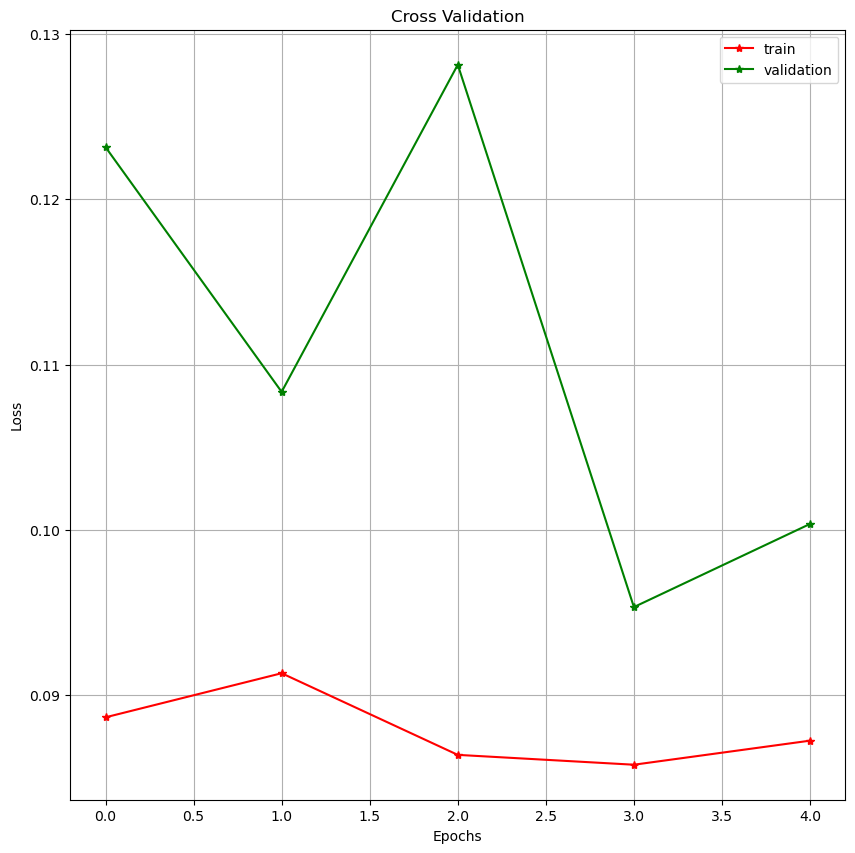

In [156]:
acbd = pd.DataFrame(history.history)
plt.figure(figsize=(10, 10))
plt.plot(acbd['loss'], color='red', label='train', marker='*') 
plt.plot(acbd['val_loss'], color='green', label='validation', marker='*')
plt.legend()
plt.grid()
plt.title('Cross Validation')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.show()

In [ ]:
# so after th epoch model validation error get increses while tarin error stabalize so after 3rd epochs model will get overffited